## Simple Harmonic Motion
### Equations of motion
### AMC Dawes
*Based on https://flothesof.github.io/harmonic-oscillator-three-methods-solution.html* but with revisions and corrections.

In [1]:
# These add the sympy features, and tell the plotting library to show plots in the notebook
import sympy
%matplotlib inline

In [2]:
# This makes sympy show you nicely formatted equations (using LaTeX)
sympy.init_printing()

In [3]:
# We need to tell sympy what letters are symbolic math, either constants or variables
m, k, x_0, v_0, omega_0, t = sympy.symbols('m, k, x_0, v_0, omega_0, t')

# and that x is actually a function x(t):
x = sympy.Function('x')

The equation we aim to solve is:
$$\frac{d^2x(t)}{dt^2} = - \omega_0^2 x(t)$$ or:
$$\frac{d^2x(t)}{dt^2} + \omega_0^2 x(t) = 0$$
where the second form of the equation is how most computer algebra systems expect an equation to be entered.

In [4]:
# Define the equation we aim to solve:
eqn = sympy.Derivative(x(t), t, 2) + omega_0**2 * x(t)

In [5]:
# Solve using the dsolve function
sol = sympy.dsolve(eqn)
sol

The initial conditions are defined by solutions at $t=0$. The trick here is to solve both the position equation: $x(t=0)$ and the velocity equation: $\frac{dx}{dt}\Big|_{(t=0)}$

In [8]:
# The full position equation x(t):
sol.args[1]

In [9]:
# The derivative (i.e. velocity) equation:
sol.args[1].diff(t)

To solve for the initial conditions, substitute $t=0$ and solve for the initial position (`x_0`) and the initial velocity (`v_0`):

In [10]:
ics = [sympy.Eq(sol.args[1].subs(t, 0), x_0), sympy.Eq(sol.args[1].diff(t).subs(t, 0), v_0)]
ics

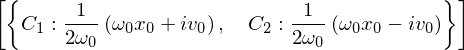

In [11]:
solved_ics = sympy.solve(ics)
solved_ics

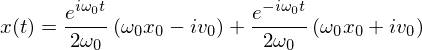

In [12]:
full_sol = sol.subs(solved_ics[0])
full_sol

### It would be really nice if this simplified a bit!

This is the most general solution, so picking some initial conditions may reveal a simpler form of the equation:

In [13]:
# Start at x=1, but stopped:
case1 = sympy.simplify(full_sol.subs({x_0:1, v_0:0, omega_0:1}))
case1

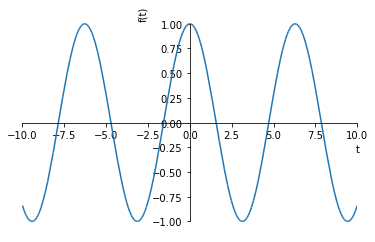

In [14]:
sympy.plot(case1.rhs)

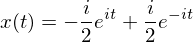

In [15]:
# start at x0 but moving to the positive-x direction:
case2 = sympy.trigsimp(full_sol.subs({x_0:0, v_0:1, omega_0:1}))
case2

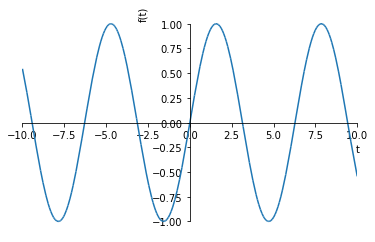

In [16]:
sympy.plot(case2.rhs)

### 1) Generate three additional cases that have different initial conditions. Describe the predicted motion, and discuss: does the resulting motion agree with your expectations? Consider how the parameters can change and explore a variety of options. 

### 2) How do the dynamics change if $\omega_0$ changes?